In [131]:
import pandas as pd
from datetime import datetime
import os
import matplotlib.pyplot as plt

In [135]:
# Import csv
fpath = "GBPUSD_2018.csv"
df = pd.read_csv(fpath)

# Process columns
df.columns = ["date", "time", "val", "B", "C", "D", "E"] # QUESTION about additional columns
df = df.drop(columns=['B', 'C', 'D', 'E'])

# Process datetime
df['datetime'] = df["date"].map(str) + " " + df["time"] # create datetime column
df["datetime"] = pd.to_datetime(df["datetime"])
df["date"] = pd.to_datetime(df["date"]) # datetime-ify 'date time' column
df = df.set_index('datetime')
df = df[['date', 'time', 'val']]
df = df.drop(columns=['time'])

In [136]:
mdf = df.between_time('10:30', '11:02')
mdf

,date,val
datetime,,
2018-01-02 10:30:00,2018-01-02,1.35494
2018-01-02 10:31:00,2018-01-02,1.35473
2018-01-02 10:32:00,2018-01-02,1.35473
2018-01-02 10:33:00,2018-01-02,1.35465
2018-01-02 10:34:00,2018-01-02,1.35465
2018-01-02 10:35:00,2018-01-02,1.35473
2018-01-02 10:36:00,2018-01-02,1.35508
2018-01-02 10:37:00,2018-01-02,1.35519
2018-01-02 10:38:00,2018-01-02,1.35535


In [137]:
df_1030 = df.between_time('10:30', '10:30')
df_1045 = df.between_time('10:45', '10:45')
df_1102 = df.between_time('11:02', '11:02')

In [35]:
print(df_1030.loc['2018-01-02 10:30:00']['val'])

1.35494


### Note to self
- `df[COL][INDEX]`
- When accessing a dataframe through index, use `df.loc[idx]` to identify the row, use `df.loc[idx]['col_x']` to further locate a data

## Questions to investigate

For each day's 10:30 - 11:02 timeframe (we ignore data from the rest of the day), we analyze minutely data and their relationship with the 10:30 and 10:45 prices

1.  Find the max pip movement above and below the 10:30 and 10:45 prices within the timeframe.
2.  Find if the timeframe was long/short relative to 1) the 10:30 price, and 2) the 10:45 price; we achieve this by comparing the 11:02 price with the 10:30 and 10:45 prices, respectively. 
3. The average for distance moved for and against 10:30 and 10:45 entries

### Q1 Algorithm
Find the max pip movement above and below the 10:30 and 10:45 prices within the timeframe.
- First, isolate each day's data in 10:30 - 11:02 [DONE]
- Then, store 10:30 and 10:45's price. [DONE]
- Iterate through each minute to find pip movement. Update pip if larger movement is found. 

```
datetime: {
    max_pip_1030: p
    max_pip_1045: q
}
```

Note:
It would be nice to know which minute's data resulted in this max pip movement

### Q2 Algorithm
Find if the timeframe was long/short relative to 1) the 10:30 price, and 2) the 10:45 price; we achieve this by comparing the 11:02 price with the 10:30 and 10:45 prices, respectively. 

In [118]:
current_date = None
price_1030 = None
price_1045 = None

mpip = {} #key: date; value: max_pip
col_max_pip_1030 = '1030_MAX_PIP'
col_max_pip_1045 = '1045_MAX_PIP'
col_max_pip_1030_dt = "1030_DATETIME_MPIP"
col_max_pip_1045_dt = "1045_DATETIME_MPIP"
col_max_pip_1030_price = "1030_PRICE_MPIP"
col_max_pip_1045_price = "1045_PRICE_MPIP"


long_short_tf = {} #key: date; value: if day was long or short
col_ls_1030 = '1030_LS'
col_ls_1045 = '1045_LS'
col_1030_price = '1030_PRICE'
col_1045_price = '1045_PRICE'
col_1102_close_price = '1102_CLOSE'

### Solve Q1, Q2 by iterating through the morning dataframe (10:30-11:02, daily)

In [119]:
for index, row in mdf.iterrows():
    
    if index.date() != current_date:
        # Initialize mpip data and store 10:30 & 10:45 prices. 
        current_date = index.date()
        mpip[current_date] = { 
            col_max_pip_1030: 0, 
            col_max_pip_1045: 0, 
            col_max_pip_1030_dt: 0, 
            col_max_pip_1045_dt: 0, 
            col_max_pip_1030_price: 0, 
            col_max_pip_1045_price: 0
        }
        long_short_tf[current_date] = {
            col_ls_1030: 'N/A', 
            col_ls_1045: 'N/A', 
            col_1030_price: 'N/A', 
            col_1045_price: 'N/A',
            col_1102_close_price: 'N/A'
        }
        df_1030_idx = str(current_date) + " 10:30:00"
        df_1045_idx = str(current_date) + " 10:45:00"
        price_1030 = df_1030.loc[df_1030_idx]['val']
        price_1045 = df_1045.loc[df_1045_idx]['val']
        mpip[current_date][col_1030_price] = price_1030
        mpip[current_date][col_1045_price] = price_1045
        
    # Record / update daily max pip movement compared to 10:30 & 10:45 prices 
    cur_pip_1030 = round((row['val'] - price_1030) * 10000, 4)
    cur_pip_1045 = round((row['val'] - price_1045) * 10000, 4)
    if abs(cur_pip_1030) > mpip[current_date][col_max_pip_1030]:
        mpip[current_date][col_max_pip_1030] = cur_pip_1030
        mpip[current_date][col_max_pip_1030_dt] = index
        mpip[current_date][col_max_pip_1030_price] = row['val']
    if abs(cur_pip_1045) > mpip[current_date][col_max_pip_1045]:
        mpip[current_date][col_max_pip_1045] = cur_pip_1045
        mpip[current_date][col_max_pip_1045_dt] = index
        mpip[current_date][col_max_pip_1045_price] = row['val']

    if str(index) == str(current_date) + " 11:02:00":
        # Record if the timeframe was long or short compared to 10:30 & 10:45 prices 
        long_short_tf[current_date][col_1030_price] = price_1030
        long_short_tf[current_date][col_1045_price] = price_1045
        long_short_tf[current_date][col_1102_close_price] = row['val']
        if row['val'] > price_1030: 
            long_short_tf[current_date][col_ls_1030] = 'LONG'
        elif row['val'] < price_1030: 
            long_short_tf[current_date][col_ls_1030] = 'SHORT'
        else: 
            long_short_tf[current_date][col_ls_1030] = 'PAR'
        if row['val'] > price_1045: 
            long_short_tf[current_date][col_ls_1045] = 'LONG'
        elif row['val'] < price_1045:
            long_short_tf[current_date][col_ls_1045] = 'SHORT'
        else: 
            long_short_tf[current_date][col_ls_1045] = 'PAR'

### Q1: Max pip movement result, tabulated & plotted

In [124]:
df_mpip = pd.DataFrame.from_dict(mpip, orient='index')
df_mpip = df_mpip[[col_max_pip_1030, col_1030_price, col_max_pip_1030_price, col_max_pip_1030_dt,\
                   col_max_pip_1045, col_1045_price, col_max_pip_1045_price, col_max_pip_1045_dt]]
df_mpip

,1030_MAX_PIP,1030_PRICE,1030_PRICE_MPIP,1030_DATETIME_MPIP,1045_MAX_PIP,1045_PRICE,1045_PRICE_MPIP,1045_DATETIME_MPIP
2018-01-02,31.5,1.35494,1.35809,2018-01-02 10:59:00,22.6,1.35583,1.35809,2018-01-02 10:59:00
2018-01-03,15.1,1.34995,1.35146,2018-01-03 10:57:00,4.0,1.35106,1.35146,2018-01-03 10:57:00
2018-01-04,-2.5,1.35534,1.35509,2018-01-04 11:02:00,-5.1,1.35560,1.35509,2018-01-04 11:02:00
2018-01-05,0.7,1.35622,1.35629,2018-01-05 11:02:00,10.8,1.35534,1.35642,2018-01-05 10:33:00
2018-01-08,27.3,1.35537,1.35810,2018-01-08 11:01:00,23.2,1.35578,1.35810,2018-01-08 11:01:00
2018-01-09,12.2,1.35157,1.35279,2018-01-09 10:55:00,7.0,1.35209,1.35279,2018-01-09 10:55:00
2018-01-10,-3.6,1.35315,1.35279,2018-01-10 11:02:00,9.7,1.35238,1.35335,2018-01-10 10:33:00
2018-01-11,9.8,1.35334,1.35432,2018-01-11 10:43:00,-1.5,1.35394,1.35379,2018-01-11 11:02:00
2018-01-12,15.8,1.36733,1.36891,2018-01-12 11:01:00,11.8,1.36773,1.36891,2018-01-12 11:01:00
2018-01-15,22.6,1.37839,1.38065,2018-01-15 11:01:00,11.4,1.37951,1.38065,2018-01-15 11:01:00


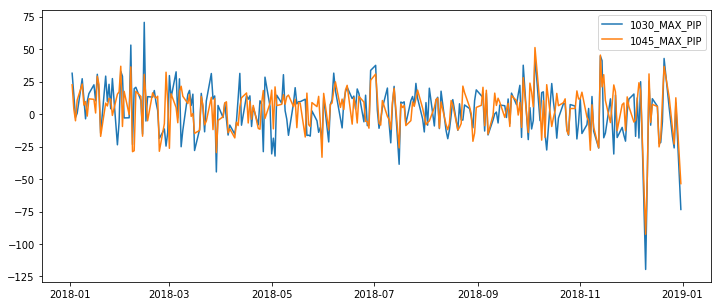

In [130]:
df_mpip[[col_max_pip_1030, col_max_pip_1045]].plot(figsize=(12, 5))

### Q2: Whether each daily timeframe is long/short compared against the 10:30 & 10:45 prices, tabulated

In [121]:
df_ls = pd.DataFrame.from_dict(long_short_tf, orient='index')
df_ls = df_ls[[col_ls_1030, col_1030_price, col_ls_1045, col_1045_price, col_1102_close_price]]
df_ls

,1030_LS,1030_PRICE,1045_LS,1045_PRICE,1102_CLOSE
2018-01-02,LONG,1.35494,LONG,1.35583,1.35774
2018-01-03,LONG,1.34995,LONG,1.35106,1.35134
2018-01-04,SHORT,1.35534,SHORT,1.35560,1.35509
2018-01-05,LONG,1.35622,LONG,1.35534,1.35629
2018-01-08,LONG,1.35537,LONG,1.35578,1.35796
2018-01-09,LONG,1.35157,LONG,1.35209,1.35210
2018-01-10,SHORT,1.35315,LONG,1.35238,1.35279
2018-01-11,LONG,1.35334,SHORT,1.35394,1.35379
2018-01-12,LONG,1.36733,LONG,1.36773,1.36855
2018-01-15,LONG,1.37839,LONG,1.37951,1.38031
